In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from pythermalcomfort.models import pmv_ppd

In [2]:
datos_ePMV = pd.read_csv("datos_ePMV.csv", index_col=0, parse_dates=True)
datos_ePMV

,clo,e,met,voto,Temperatura_prom,Humedad_prom,Presion_prom,PMV,PPD,Mmod,ePMV
ts,,,,,,,,,,,
2024-10-30 10:02:58.127,0.97,0.7,1.0,-0.4,23.398480,55.424856,880.613608,0.08,5.1,0.994640,0.042
2024-10-30 10:03:42.595,0.60,0.7,1.1,-1.0,23.398480,55.424856,880.613608,-0.36,7.7,1.126532,-0.203
2024-10-30 10:03:55.674,0.63,0.7,1.0,1.2,23.398480,55.424856,880.613608,-0.58,12.1,1.038860,-0.322
2024-10-30 10:04:18.802,0.68,0.7,1.0,0.0,23.398480,55.424856,880.613608,-0.46,9.5,1.030820,-0.259
2024-10-30 10:04:31.881,0.94,0.7,1.0,0.0,23.398480,55.424856,880.613608,0.03,5.0,0.997990,0.014
...,...,...,...,...,...,...,...,...,...,...,...
2024-11-20 10:16:24.922,0.50,0.7,1.0,-1.2,24.975535,57.582175,855.392125,-0.30,6.9,1.020100,-0.175
2024-11-20 10:16:33.507,0.75,0.7,1.0,0.0,24.975535,57.582175,855.392125,0.22,6.0,0.985260,0.112
2024-11-20 10:16:38.153,0.68,0.7,1.1,0.0,24.975535,57.582175,855.392125,0.30,6.9,1.077890,0.182


In [3]:
counts = {
    'voto': {
        'positivos': (datos_ePMV['voto'] > 0).sum(),
        'negativos': (datos_ePMV['voto'] < 0).sum(),
        'ceros': (datos_ePMV['voto'] == 0).sum()
    },
    'PMV': {
        'positivos': (datos_ePMV['PMV'] > 0).sum(),
        'negativos': (datos_ePMV['PMV'] < 0).sum(),
        'ceros': (datos_ePMV['PMV'] == 0).sum()
    },
    'ePMV': {
        'positivos': (datos_ePMV['ePMV'] > 0).sum(),
        'negativos': (datos_ePMV['ePMV'] < 0).sum(),
        'ceros': (datos_ePMV['ePMV'] == 0).sum()
    }
}


#Como hay bastantes PMV negativos, si vale la pena calcular un valor lambda para frio y otro para calido
counts

{'voto': {'positivos': np.int64(47),
  'negativos': np.int64(38),
  'ceros': np.int64(39)},
 'PMV': {'positivos': np.int64(85),
  'negativos': np.int64(38),
  'ceros': np.int64(1)},
 'ePMV': {'positivos': np.int64(85),
  'negativos': np.int64(38),
  'ceros': np.int64(1)}}

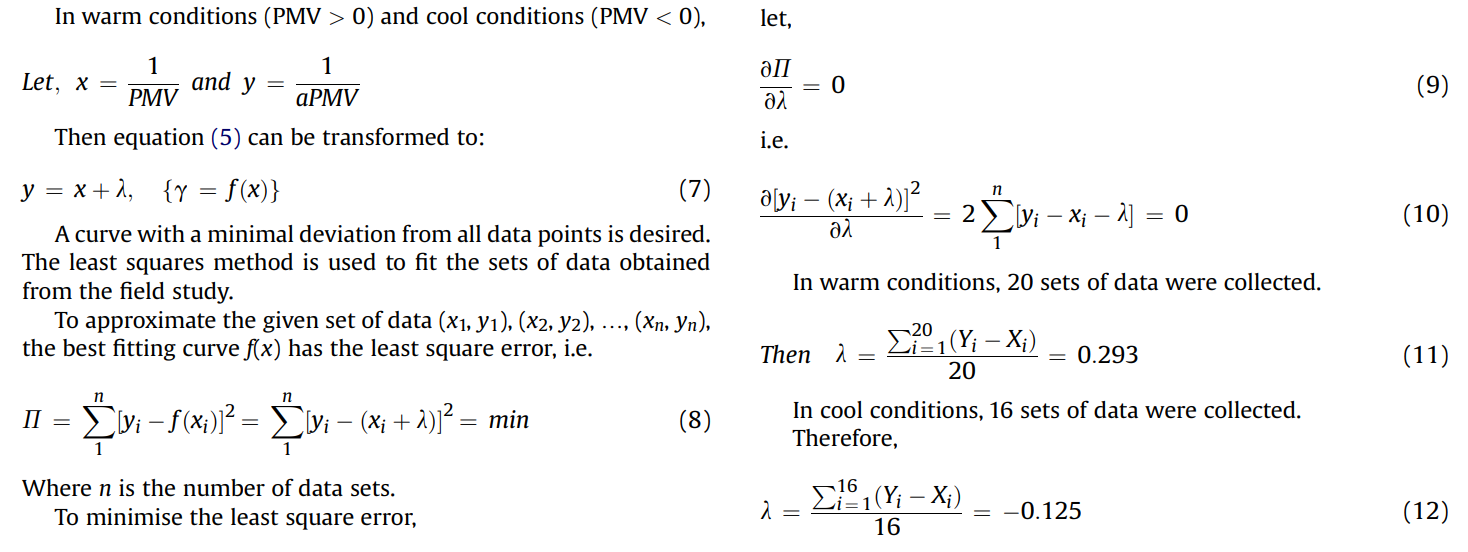

$$
\lambda = \frac{\sum_{i=1}^{n} (Y_i - X_i)}{n}
$$
$$
Donde:
$$
$$
n=número-de-datos
$$
$$
X = \frac{1}{PMV}
$$
$$
Y = \frac{1}{votoST}
$$

In [4]:
# Filtrar filas donde PMV es negativo y voto es diferente de cero
datos_frio = datos_ePMV[(datos_ePMV['PMV'] < 0) & (datos_ePMV['voto'] != 0)]

# Realizar la operación para cada fila
resultado = (1 / datos_frio['PMV'] - 1 / datos_frio['voto']).sum()

# Contar cuántos valores negativos tiene la columna PMV
num_valores_negativos = len(datos_frio)

# Dividir la suma entre el número de valores negativos
if num_valores_negativos > 0:
    l_frio = resultado / num_valores_negativos
    # Mostrar el resultado
    print("l_frio:", round(l_frio,2))
else:
    print("No hay valores negativos de PMV con votos distintos de cero.")



l_frio: -13.32


$$
\lambda_{frío} = -13.32
$$

In [5]:
(datos_frio['voto'] == 0).sum()

np.int64(0)

In [6]:
# Filtrar filas donde PMV es negativo y voto es diferente de cero
datos_caliente = datos_ePMV[(datos_ePMV['PMV'] > 0) & (datos_ePMV['voto'] != 0)]

# Realizar la operación para cada fila
resultado = (1 / datos_caliente['PMV'] - 1 / datos_caliente['voto']).sum()

# Contar cuántos valores negativos tiene la columna PMV
num_valores = len(datos_caliente)

# Dividir la suma entre el número de valores negativos
if num_valores > 0:
    l_caliente = resultado / num_valores
    # Mostrar el resultado
    print("l_caliente:", round(l_caliente,2))
else:
    print("No hay valores negativos de PMV con votos distintos de cero.")



l_caliente: 3.35


$$
\lambda_{caliente} = 3.35
$$

In [7]:
(datos_caliente['voto'] == 0).sum()

np.int64(0)

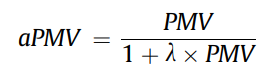

In [8]:
def calcular_aPMV(pmv):
    if pmv <= 0:
        lambda_value = l_frio
    else:
        lambda_value = l_caliente
    # Aplicar la fórmula aPMV = PMV / (1 + lambda * PMV)
    return pmv / (1 + lambda_value * pmv)

In [9]:
# Aplicar la función a la columna PMV y crear la nueva columna 'aPMV'
datos_ePMV['aPMV'] = datos_ePMV['PMV'].apply(calcular_aPMV)

# Ver los primeros valores del dataframe para confirmar
datos_ePMV


,clo,e,met,voto,Temperatura_prom,Humedad_prom,Presion_prom,PMV,PPD,Mmod,ePMV,aPMV
ts,,,,,,,,,,,,
2024-10-30 10:02:58.127,0.97,0.7,1.0,-0.4,23.398480,55.424856,880.613608,0.08,5.1,0.994640,0.042,0.063096
2024-10-30 10:03:42.595,0.60,0.7,1.1,-1.0,23.398480,55.424856,880.613608,-0.36,7.7,1.126532,-0.203,-0.062138
2024-10-30 10:03:55.674,0.63,0.7,1.0,1.2,23.398480,55.424856,880.613608,-0.58,12.1,1.038860,-0.322,-0.066491
2024-10-30 10:04:18.802,0.68,0.7,1.0,0.0,23.398480,55.424856,880.613608,-0.46,9.5,1.030820,-0.259,-0.064560
2024-10-30 10:04:31.881,0.94,0.7,1.0,0.0,23.398480,55.424856,880.613608,0.03,5.0,0.997990,0.014,0.027261
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-20 10:16:24.922,0.50,0.7,1.0,-1.2,24.975535,57.582175,855.392125,-0.30,6.9,1.020100,-0.175,-0.060064
2024-11-20 10:16:33.507,0.75,0.7,1.0,0.0,24.975535,57.582175,855.392125,0.22,6.0,0.985260,0.112,0.126675
2024-11-20 10:16:38.153,0.68,0.7,1.1,0.0,24.975535,57.582175,855.392125,0.30,6.9,1.077890,0.182,0.149654


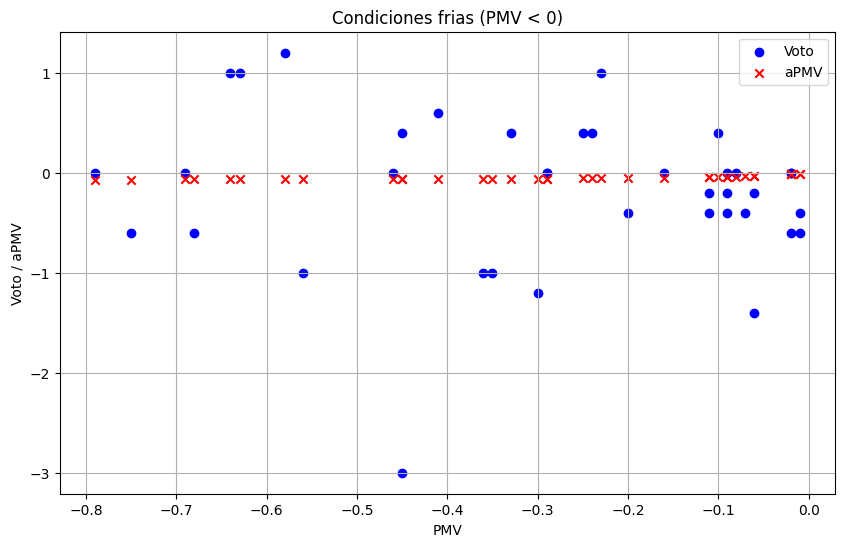

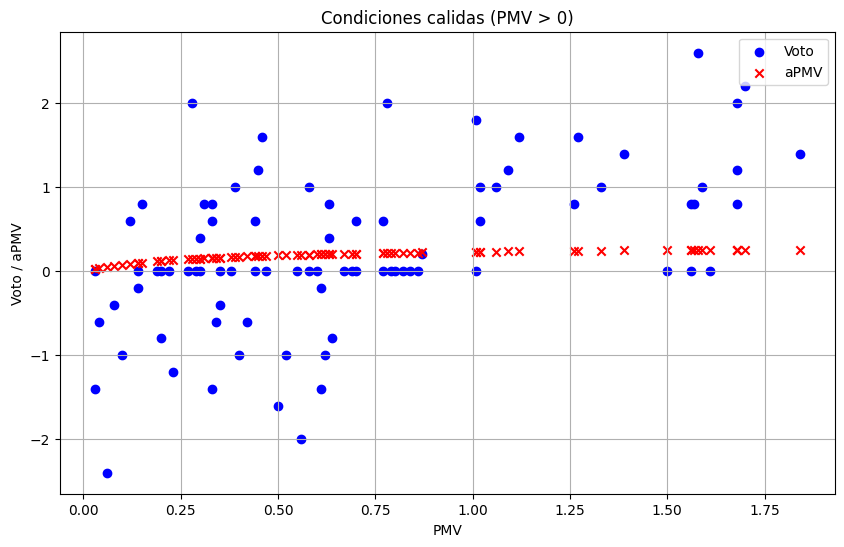

In [10]:
import matplotlib.pyplot as plt

# Filtrar los datos para PMV < 0
datos_frio = datos_ePMV[datos_ePMV['PMV'] < 0]

# Filtrar los datos para PMV > 0
datos_caliente = datos_ePMV[datos_ePMV['PMV'] > 0]

# Crear la primera gráfica para PMV < 0
plt.figure(figsize=(10, 6))
plt.scatter(datos_frio['PMV'], datos_frio['voto'], color='b', marker='o', label='Voto')
plt.scatter(datos_frio['PMV'], datos_frio['aPMV'], color='r', marker='x', label='aPMV')

# Agregar títulos y etiquetas
plt.title('Condiciones frias (PMV < 0)')
plt.xlabel('PMV')
plt.ylabel('Voto / aPMV')
plt.legend()
plt.grid(True)
plt.show()

# Crear la segunda gráfica para PMV > 0
plt.figure(figsize=(10, 6))
plt.scatter(datos_caliente['PMV'], datos_caliente['voto'], color='b', marker='o', label='Voto')
plt.scatter(datos_caliente['PMV'], datos_caliente['aPMV'], color='r', marker='x', label='aPMV')

# Agregar títulos y etiquetas
plt.title('Condiciones calidas (PMV > 0)')
plt.xlabel('PMV')
plt.ylabel('Voto / aPMV')
plt.legend()
plt.grid(True)
plt.show()


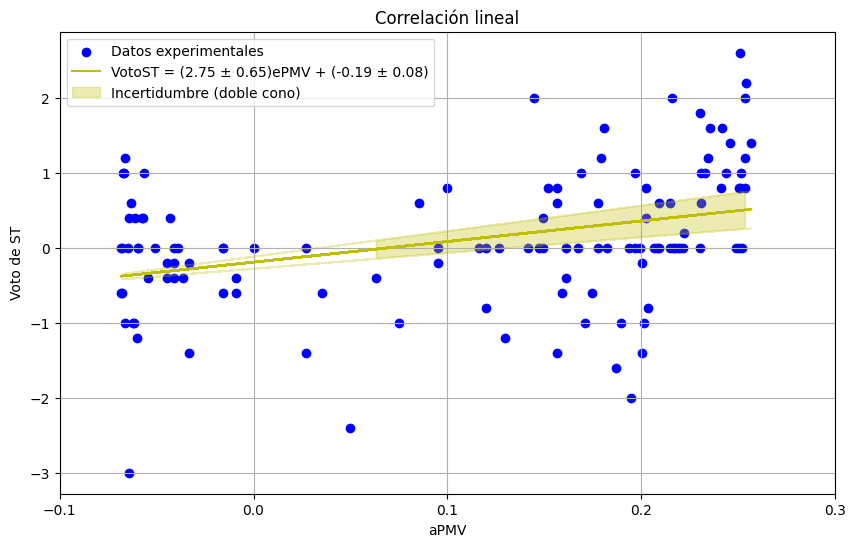

Pendiente (slope): 2.75 ± 0.65
Ordenada al origen (intercept): -0.19 ± 0.08
R² (Coeficiente de determinación): 0.13


In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Supongamos que ya tienes los datos en `datos_ePMV`
# Ejemplo:
y = datos_ePMV['voto']
x = datos_ePMV['aPMV']

# Realizar la regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calcular la incertidumbre asociada a la pendiente y la ordenada al origen
n = len(x)  # Número de puntos
x_mean = np.mean(x)  # Media de x
std_slope = std_err  # Desviación estándar de la pendiente (ya calculada)
std_intercept = std_err * np.sqrt(np.sum(x**2) / (n * np.sum((x - x_mean)**2)))  # Desviación estándar de la ordenada

# Calcular la línea de regresión para graficarla
line = slope * x + intercept

# Calcular los límites del área gris (doble cono)
lower_bound = (slope - std_slope) * x + (intercept - std_intercept)
upper_bound = (slope + std_slope) * x + (intercept + std_intercept)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='b', marker='o', label='Datos experimentales')
plt.plot(x, line, color='y', label=(
    f'VotoST = ({slope:.2f} ± {std_slope:.2f})ePMV + ({intercept:.2f} ± {std_intercept:.2f})'))

# Agregar el área gris
plt.fill_between(x, lower_bound, upper_bound, color='y', alpha=0.3, label='Incertidumbre (doble cono)')

# Ajustar el rango y los ticks del eje x
plt.xticks(np.arange(round(min(x), 1), max(x) + 0.1, 0.1))

# Agregar títulos y etiquetas
plt.title('Correlación lineal')
plt.xlabel('aPMV')
plt.ylabel('Voto de ST')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()

# Imprimir los resultados de la regresión
print(f"Pendiente (slope): {slope:.2f} ± {std_slope:.2f}")
print(f"Ordenada al origen (intercept): {intercept:.2f} ± {std_intercept:.2f}")
print(f"R² (Coeficiente de determinación): {r_value**2:.2f}")

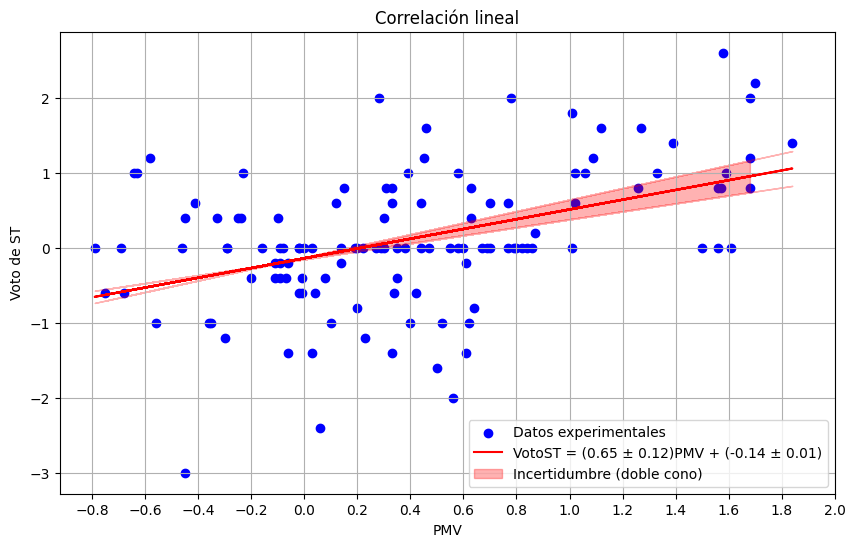

Pendiente (slope): 0.65 ± 0.12
Ordenada al origen (intercept): -0.14 ± 0.01
R² (Coeficiente de determinación): 0.20


In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Supongamos que ya tienes los datos en `datos_ePMV`
# Ejemplo:
y = datos_ePMV['voto']
x = datos_ePMV['PMV']

# Realizar la regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calcular la incertidumbre asociada a la pendiente y la ordenada al origen
n = len(x)  # Número de puntos
x_mean = np.mean(x)  # Media de x
std_slope = std_err  # Desviación estándar de la pendiente (ya calculada)
std_intercept = std_err * np.sqrt(np.sum(x**2) / (n * np.sum((x - x_mean)**2)))  # Desviación estándar de la ordenada

# Calcular la línea de regresión para graficarla
line = slope * x + intercept

# Calcular los límites del área gris (doble cono)
lower_bound = (slope - std_slope) * x + (intercept - std_intercept)
upper_bound = (slope + std_slope) * x + (intercept + std_intercept)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='b', marker='o', label='Datos experimentales')
plt.plot(x, line, color='r', label=(
    f'VotoST = ({slope:.2f} ± {std_slope:.2f})PMV + ({intercept:.2f} ± {std_intercept:.2f})'))

# Agregar el área gris
plt.fill_between(x, lower_bound, upper_bound, color='red', alpha=0.3, label='Incertidumbre (doble cono)')

# Ajustar el rango y los ticks del eje x
plt.xticks(np.arange(round(min(x), 1), max(x) + 0.2, 0.2))

# Agregar títulos y etiquetas
plt.title('Correlación lineal')
plt.xlabel('PMV')
plt.ylabel('Voto de ST')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()

# Imprimir los resultados de la regresión
print(f"Pendiente (slope): {slope:.2f} ± {std_slope:.2f}")
print(f"Ordenada al origen (intercept): {intercept:.2f} ± {std_intercept:.2f}")
print(f"R² (Coeficiente de determinación): {r_value**2:.2f}")

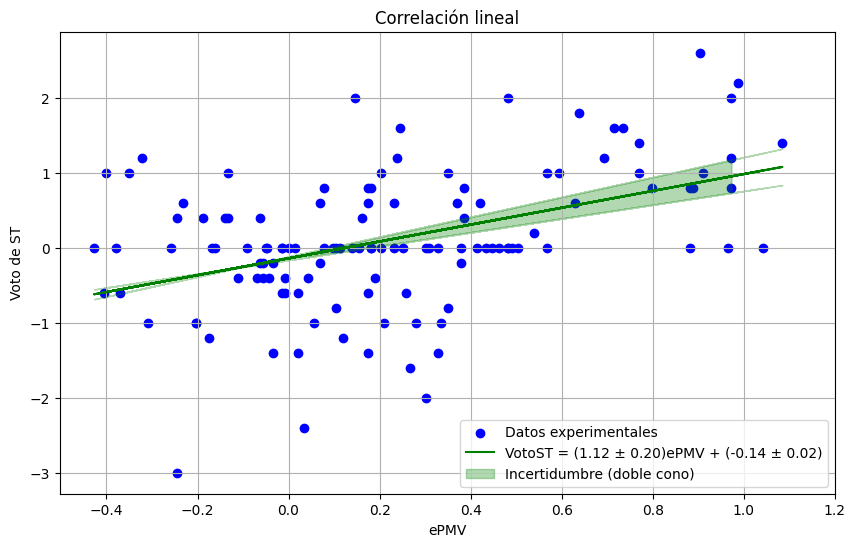

Pendiente (slope): 1.12 ± 0.20
Ordenada al origen (intercept): -0.14 ± 0.02
R² (Coeficiente de determinación): 0.20


In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Supongamos que ya tienes los datos en `datos_ePMV`
# Ejemplo:
y = datos_ePMV['voto']
x = datos_ePMV['ePMV']

# Realizar la regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calcular la incertidumbre asociada a la pendiente y la ordenada al origen
n = len(x)  # Número de puntos
x_mean = np.mean(x)  # Media de x
std_slope = std_err  # Desviación estándar de la pendiente (ya calculada)
std_intercept = std_err * np.sqrt(np.sum(x**2) / (n * np.sum((x - x_mean)**2)))  # Desviación estándar de la ordenada

# Calcular la línea de regresión para graficarla
line = slope * x + intercept

# Calcular los límites del área gris (doble cono)
lower_bound = (slope - std_slope) * x + (intercept - std_intercept)
upper_bound = (slope + std_slope) * x + (intercept + std_intercept)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='b', marker='o', label='Datos experimentales')
plt.plot(x, line, color='g', label=(
    f'VotoST = ({slope:.2f} ± {std_slope:.2f})ePMV + ({intercept:.2f} ± {std_intercept:.2f})'))

# Agregar el área gris
plt.fill_between(x, lower_bound, upper_bound, color='green', alpha=0.3, label='Incertidumbre (doble cono)')

# Ajustar el rango y los ticks del eje x
plt.xticks(np.arange(round(min(x), 1), max(x) + 0.2, 0.2))

# Agregar títulos y etiquetas
plt.title('Correlación lineal')
plt.xlabel('ePMV')
plt.ylabel('Voto de ST')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()

# Imprimir los resultados de la regresión
print(f"Pendiente (slope): {slope:.2f} ± {std_slope:.2f}")
print(f"Ordenada al origen (intercept): {intercept:.2f} ± {std_intercept:.2f}")
print(f"R² (Coeficiente de determinación): {r_value**2:.2f}")

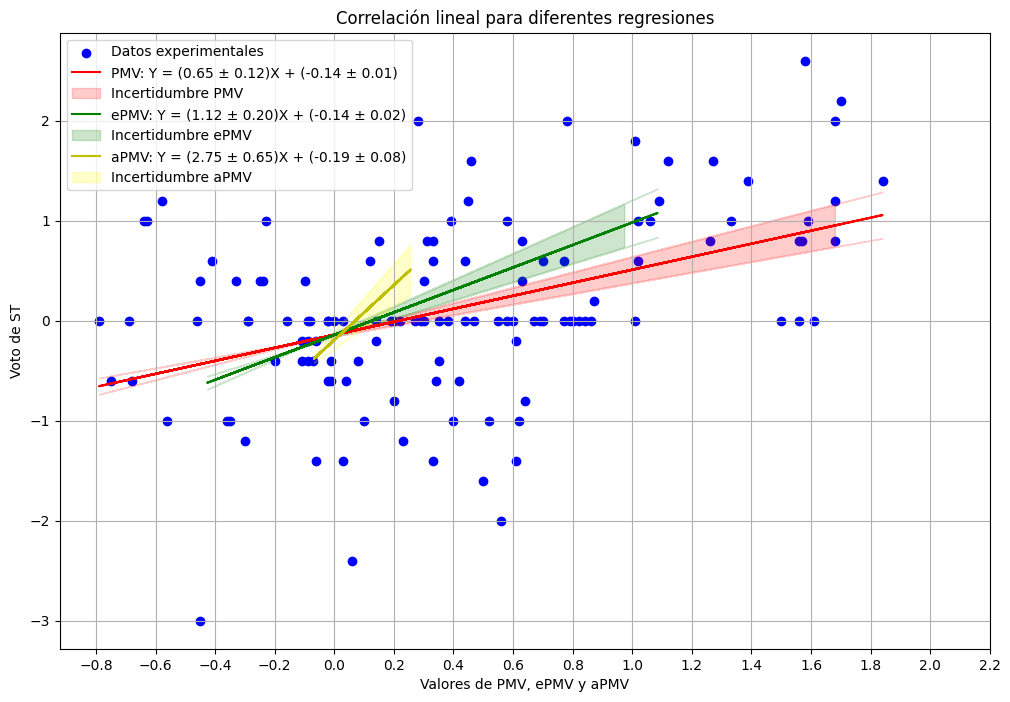

PMV: Pendiente (slope): 0.65 ± 0.12, Ordenada al origen (intercept): -0.14 ± 0.01, R²: 0.20
ePMV: Pendiente (slope): 1.12 ± 0.20, Ordenada al origen (intercept): -0.14 ± 0.02, R²: 0.20
aPMV: Pendiente (slope): 2.75 ± 0.65, Ordenada al origen (intercept): -0.19 ± 0.08, R²: 0.20


In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Supongamos que ya tienes los datos en `datos_ePMV`
# Ejemplo:
y = datos_ePMV['voto']
x1 = datos_ePMV['PMV']
x2 = datos_ePMV['ePMV']
x3 = datos_ePMV['aPMV']


# Función para realizar la regresión lineal y calcular los límites del área de incertidumbre
def calcular_regresion(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    n = len(x)
    x_mean = np.mean(x)
    std_slope = std_err
    std_intercept = std_err * np.sqrt(np.sum(x**2) / (n * np.sum((x - x_mean)**2)))
    line = slope * x + intercept
    lower_bound = (slope - std_slope) * x + (intercept - std_intercept)
    upper_bound = (slope + std_slope) * x + (intercept + std_intercept)
    return slope, intercept, std_slope, std_intercept, line, lower_bound, upper_bound

# Realizar las regresiones
slope1, intercept1, std_slope1, std_intercept1, line1, lower1, upper1 = calcular_regresion(x1, y)
slope2, intercept2, std_slope2, std_intercept2, line2, lower2, upper2 = calcular_regresion(x2, y)
slope3, intercept3, std_slope3, std_intercept3, line3, lower3, upper3 = calcular_regresion(x3, y)

# Crear la gráfica
plt.figure(figsize=(12, 8))
plt.scatter(x1, y, color='b', marker='o', label='Datos experimentales')

# Graficar las regresiones y sus áreas de incertidumbre
plt.plot(x1, line1, color='r', label=(
    f'PMV: Y = ({slope1:.2f} ± {std_slope1:.2f})X + ({intercept1:.2f} ± {std_intercept1:.2f})'))
plt.fill_between(x1, lower1, upper1, color='red', alpha=0.2, label='Incertidumbre PMV')

plt.plot(x2, line2, color='g', label=(
    f'ePMV: Y = ({slope2:.2f} ± {std_slope2:.2f})X + ({intercept2:.2f} ± {std_intercept2:.2f})'))
plt.fill_between(x2, lower2, upper2, color='green', alpha=0.2, label='Incertidumbre ePMV')

plt.plot(x3, line3, color='y', label=(
    f'aPMV: Y = ({slope3:.2f} ± {std_slope3:.2f})X + ({intercept3:.2f} ± {std_intercept3:.2f})'))
plt.fill_between(x3, lower3, upper3, color='yellow', alpha=0.2, label='Incertidumbre aPMV')

# Ajustar el rango y los ticks del eje x
plt.xticks(np.arange(round(min(x1), 1), max(x1) + 0.5, 0.2))

# Agregar títulos y etiquetas
plt.title('Correlación lineal para diferentes regresiones')
plt.xlabel('Valores de PMV, ePMV y aPMV')
plt.ylabel('Voto de ST')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()

# Imprimir los resultados de las regresiones
print(f"PMV: Pendiente (slope): {slope1:.2f} ± {std_slope1:.2f}, Ordenada al origen (intercept): {intercept1:.2f} ± {std_intercept1:.2f}, R²: {r_value**2:.2f}")
print(f"ePMV: Pendiente (slope): {slope2:.2f} ± {std_slope2:.2f}, Ordenada al origen (intercept): {intercept2:.2f} ± {std_intercept2:.2f}, R²: {r_value**2:.2f}")
print(f"aPMV: Pendiente (slope): {slope3:.2f} ± {std_slope3:.2f}, Ordenada al origen (intercept): {intercept3:.2f} ± {std_intercept3:.2f}, R²: {r_value**2:.2f}")
